In [84]:
from sklearn.feature_extraction.text import CountVectorizer, TfIdfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt 
#matplotlib inline

In [85]:
stop = set(stopwords.words('english') + \
            ['pct', 'news', 'GMT', 'AM', 'PM', 'Reuters', \
            'reuters',  'visit', 'click', \
            'Yahoo', 'suggest', 'feedback', 'alert', 'email', \
            'client', 'link', 'site', 'report', 'reports', \
            'reporting', 'said', 'data', 'market', 'markets', \
            'time', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', \
            'Friday', 'Saturday', 'Sunday', 'people', 'likely'])

In [86]:
df = pd.read_csv('phrase_bank_train.csv',  \
                names = ['headline', 'label'])


In [87]:
df.iloc[0,0]

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [88]:
import re
news_combined = ''
for row in xrange(0, len(df.index)):
    no_num_str = re.sub("^\d+\s|\s\d+\s|\s\d+$", "", df.iloc[row, 0])
    news_combined += ''.join(str(x).lower() for x in \
                              no_num_str)
news_combined[:100]

'according to gran , the company has no plans to move all production to russia , although that is whe'

In [89]:

# 408,629
len(news_combined) 

605480

In [ ]:
vctrz = TfIdfVectorizer()

In [90]:
vectorizer = CountVectorizer()
news_vect = vectorizer.build_tokenizer()(news_combined)
word_counts = pd.DataFrame([[x, news_vect.count(x)] for x in set(news_vect)], 
                           columns = ['Word', 'Count'])
                           

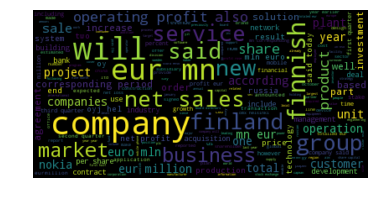

In [91]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=40).generate(news_combined)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

plt.figure()
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()


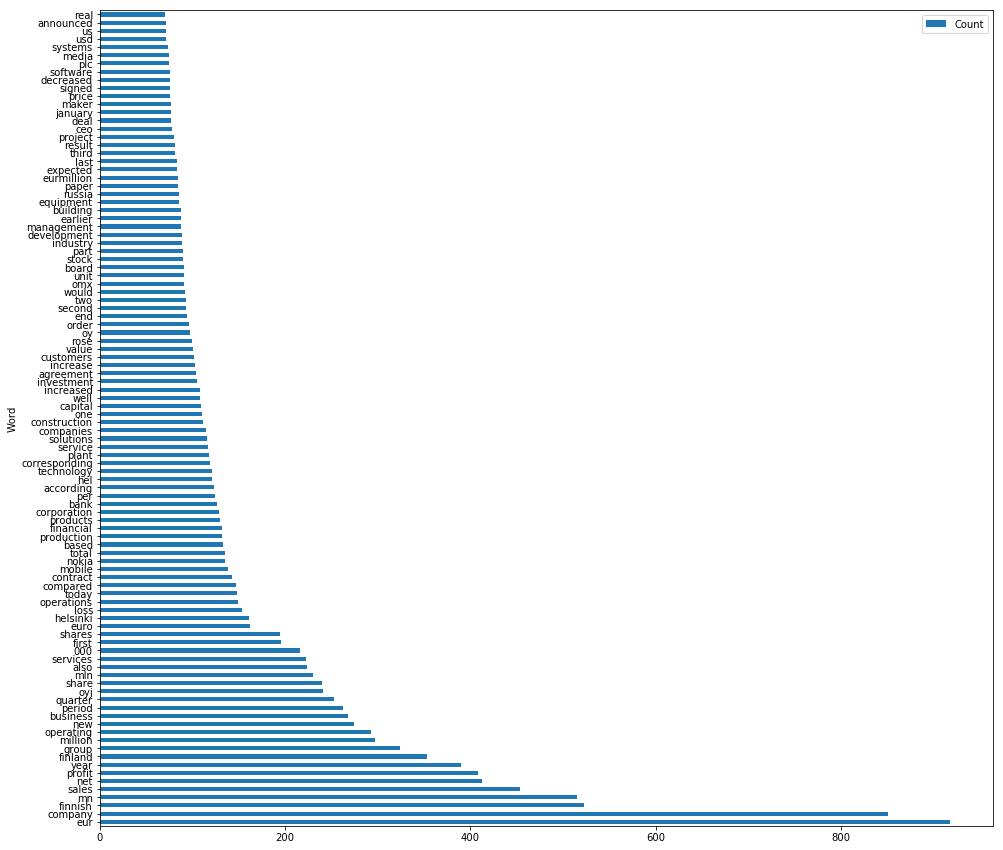

In [92]:
wrd_cnt_adj = word_counts

for w in word_counts['Word']:
    if w in stop:
        wrd_cnt_adj = wrd_cnt_adj.drop(wrd_cnt_adj[wrd_cnt_adj\
                        ['Word'] == w].index)

wrd_cnt_adj.index = wrd_cnt_adj['Word']
counts = wrd_cnt_adj.sort_values(by='Count', ascending=False)\
                [0:100].plot(kind='barh', figsize = (16,15))

plt.show()




In [93]:
tdf = pd.read_csv('R2000_50.csv')

In [94]:
tdf.columns

Index([u'TICKER', u'PUBLICATION_DATE', u'TITLE', u'SUMMARY'], dtype='object')

In [95]:
lcap_df = pd.read_csv('/Users/navatam/prj_prep/data/Lcap_sentiment.csv')


In [96]:
lcap_df.columns

Index([u'indx', u'ticker', u'headline', u'publish_date', u'sentiment'], dtype='object')

In [97]:
tw = lcap_df[lcap_df.ticker == 'TWTR']

In [98]:
# tw['pub_date'] = pd.to_datetime(tw.publish_date)
tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5903 entries, 19 to 60151
Data columns (total 5 columns):
indx            5903 non-null int64
ticker          5903 non-null object
headline        5903 non-null object
publish_date    5903 non-null object
sentiment       5903 non-null int64
dtypes: int64(2), object(3)
memory usage: 276.7+ KB


In [ ]:
aa = pd.read_clipboard(names=['pub_date','score'])

In [ ]:
aa.groupby('pub_date').mean()

In [109]:
#Sort df
aa = aa.sort_index()

#Add a moving average column
aa['ma'] = aa.score.rolling(window=30).mean()


,score,ma
pub_date,,
2017-10-20,0.477612,0.455344
2017-10-21,0.375000,0.451346


In [129]:
ndf = aa.loc[(aa.index >= pd.to_datetime('2017-07-15')) & \
             (aa.index <= pd.to_datetime('2017-08-15'))]



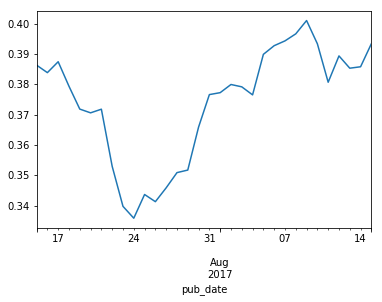

In [130]:
ndf.ma.plot()
plt.show()

In [198]:
depo = pd.read_clipboard(names=['pub_date','score'])
#depo['pub_date'] = pd.to_datetime(depo.pub_date)

#depo = depo.groupby('pub_date').mean()

#depo = depo.sort_index()
#Add a moving average column
#depo['ma'] = depo.score.rolling(window=30).mean()



In [207]:
#depo_sk = pd.read_clipboard(names=['pub_date','sk_price'])
depo_sk['pub_date'] = pd.to_datetime(depo_sk.pub_date)


In [148]:
#dp_ndf = depo.loc[(depo.index >= pd.to_datetime('2017-08-25')) & \
 #            (depo.index <= pd.to_datetime('2017-10-15'))]

# depo.ma.plot(xlim=(-1,1), ylim=(pd.to_datetime('2017-09-01'), \
#                                 pd.to_datetime('2017-10-25')))




In [164]:
#dep_dual = pd.read_clipboard(names=['pdate', 'sentscr_ma', 'stck_pr'])



In [229]:
# #mrg = pd.merge(depo, depo_sk, on = ['pub_date'])

# mrg = mrg.loc[(mrg.pub_date >= pd.to_datetime('2017-08-25')) & \
#             (mrg.pub_date <= pd.to_datetime('2017-10-15'))]

mrg.head(2)



,pub_date,score,ma,sk_price
26,2017-08-25,-0.333333,-0.202056,6.09
27,2017-08-28,-0.600000,-0.288723,6.20


In [230]:
fig = plt.figure(figsize=(13,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

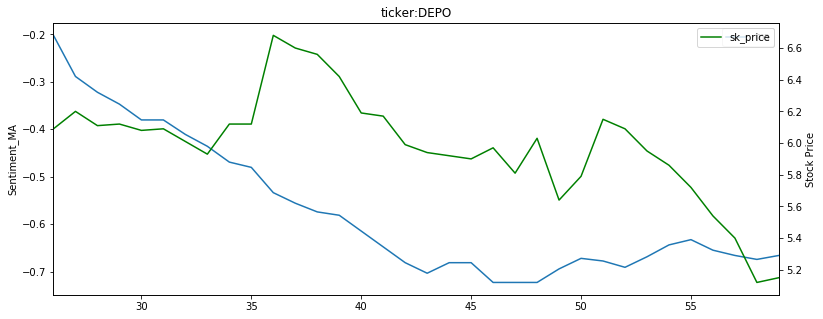

In [231]:
mrg.plot(ax=ax1, y ='ma', legend=True)
mrg.plot(ax=ax2, y='sk_price', legend=True, color='g')
ax1.set_ylabel('Sentiment_MA')
ax2.set_ylabel('Stock Price')
plt.title('ticker:DEPO')
plt.show()

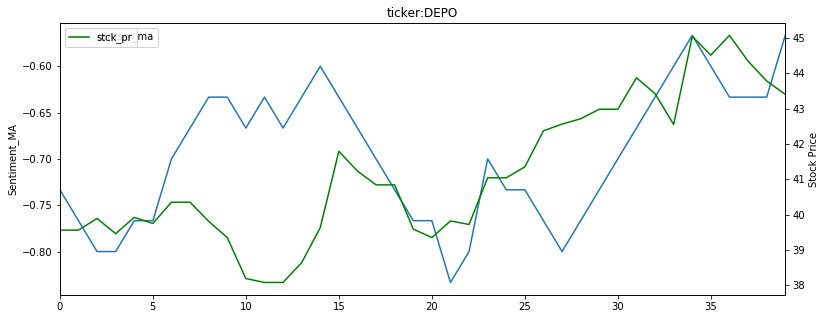

In [187]:
dep_dual.plot(ax=ax1, y ='sentscr_ma', legend=True)
dep_dual.plot(ax=ax2, y='stck_pr', legend=True, color='g')
ax1.set_ylabel('Sentiment_MA')
ax2.set_ylabel('Stock Price')
plt.title('ticker:DEPO')
plt.show()
